In [1]:
from sklearn import tree
from sklearn.datasets import load_iris

import graphviz

In [2]:
X = [[0,0], [1,1]]
Y = [0,1]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [3]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [4]:
clf.predict([[1, 1]])

array([1])

In [5]:
iris = load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

- build tree

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

- visualize tree

In [7]:
dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                feature_names = iris.feature_names,
                                class_names = iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True
                               )

In [8]:
graph = graphviz.Source(dot_data)

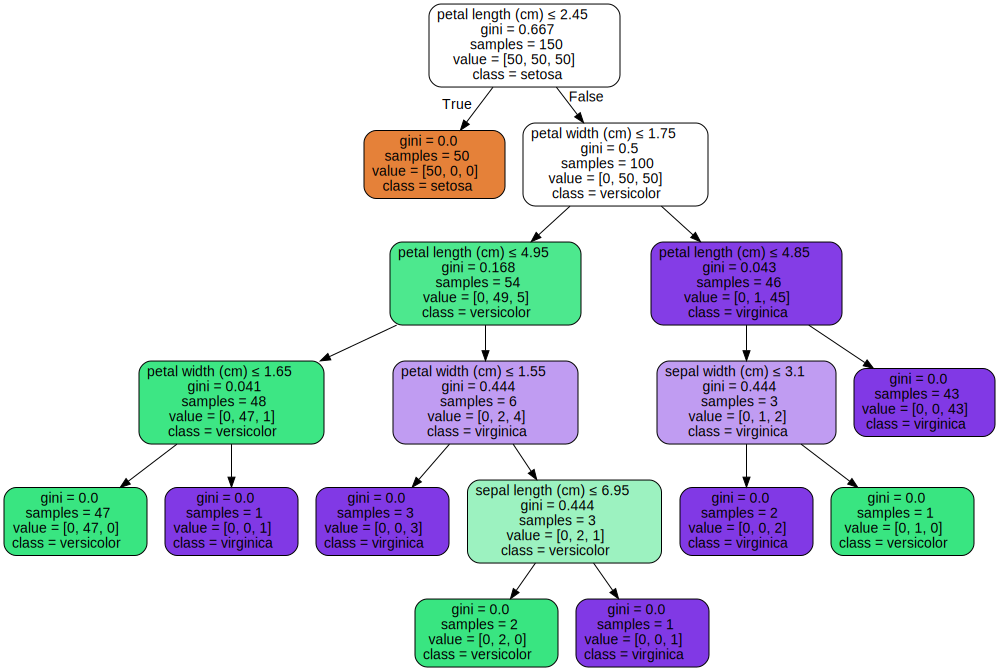

In [9]:
graph

- Create tree using entropy

In [10]:
clf2 = tree.DecisionTreeClassifier(criterion="entropy")

In [11]:
clf2.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [12]:
# visualize clf2
dot_data2 = tree.export_graphviz(clf2,
                                out_file=None,
                                feature_names = iris.feature_names,
                                class_names = iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True
                               )

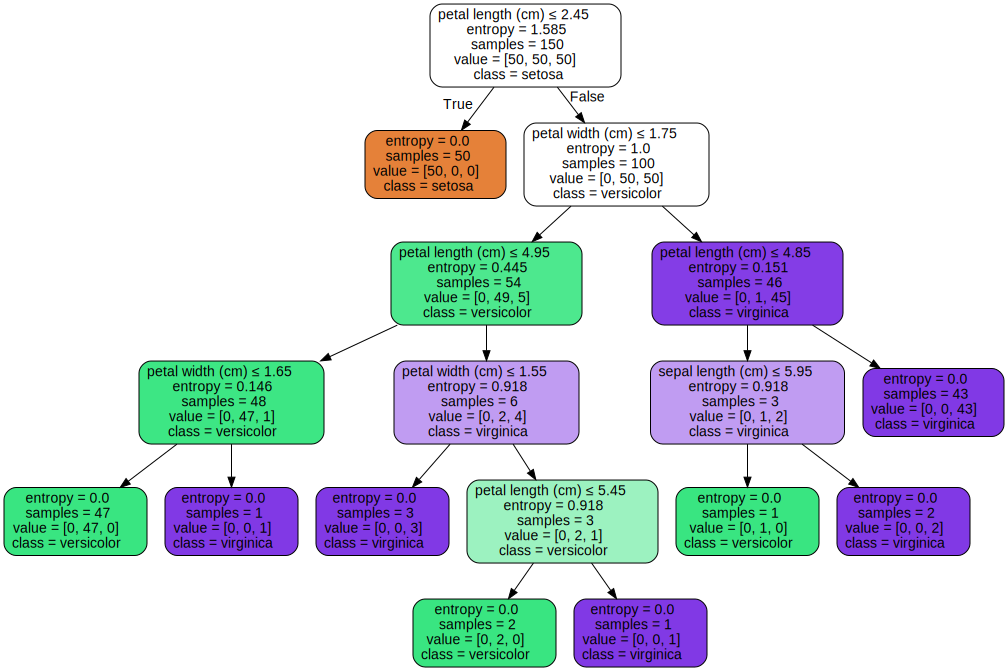

In [13]:
graph2 = graphviz.Source(dot_data2)
graph2

- pruning : shortening the tree depth

In [14]:
clf3 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)

In [15]:
clf3.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
# visualize clf3
dot_data3 = tree.export_graphviz(clf3,
                                out_file=None,
                                feature_names = iris.feature_names,
                                class_names = iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True
                               )

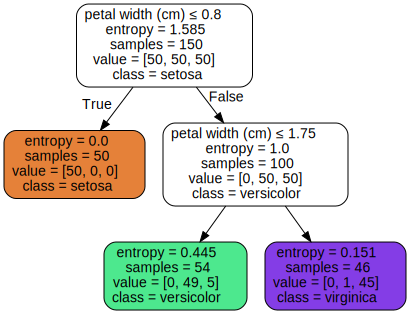

In [17]:
graph3 = graphviz.Source(dot_data3)
graph3

- confusion matrx

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(iris.target, clf.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

In [19]:
confusion_matrix(iris.target, clf2.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

In [20]:
confusion_matrix(iris.target, clf3.predict(iris.data))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]])

### Distinguish test and confusion matrix

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, random_state=1)

In [23]:
clf4 = tree.DecisionTreeClassifier(criterion="entropy")

In [24]:
clf4.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
confusion_matrix(y_test, clf4.predict(X_test))

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 12]])

### Decision regression tree

In [26]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80,1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

- build regression tree

In [27]:
regr1 = tree.DecisionTreeRegressor(max_depth=2)
regr2 = tree.DecisionTreeRegressor(max_depth=5)

In [28]:
regr1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [29]:
regr2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [30]:
X_test=np.arange(0.0, 5.0, 0.01)[:,np.newaxis]
X_test

array([[0.  ],
       [0.01],
       [0.02],
       [0.03],
       [0.04],
       [0.05],
       [0.06],
       [0.07],
       [0.08],
       [0.09],
       [0.1 ],
       [0.11],
       [0.12],
       [0.13],
       [0.14],
       [0.15],
       [0.16],
       [0.17],
       [0.18],
       [0.19],
       [0.2 ],
       [0.21],
       [0.22],
       [0.23],
       [0.24],
       [0.25],
       [0.26],
       [0.27],
       [0.28],
       [0.29],
       [0.3 ],
       [0.31],
       [0.32],
       [0.33],
       [0.34],
       [0.35],
       [0.36],
       [0.37],
       [0.38],
       [0.39],
       [0.4 ],
       [0.41],
       [0.42],
       [0.43],
       [0.44],
       [0.45],
       [0.46],
       [0.47],
       [0.48],
       [0.49],
       [0.5 ],
       [0.51],
       [0.52],
       [0.53],
       [0.54],
       [0.55],
       [0.56],
       [0.57],
       [0.58],
       [0.59],
       [0.6 ],
       [0.61],
       [0.62],
       [0.63],
       [0.64],
       [0.65],
       [0.

In [31]:
y_1 = regr1.predict(X_test)
y_2 = regr2.predict(X_test)

In [32]:
y_1

array([ 0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71

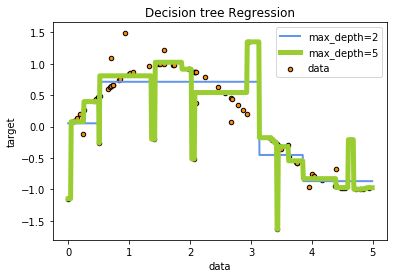

In [33]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=5)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision tree Regression")
plt.legend()
plt.show()

In [34]:
dot_data4 = tree.export_graphviz(regr2, out_file=None, filled=True, rounded=True, special_characters=True)

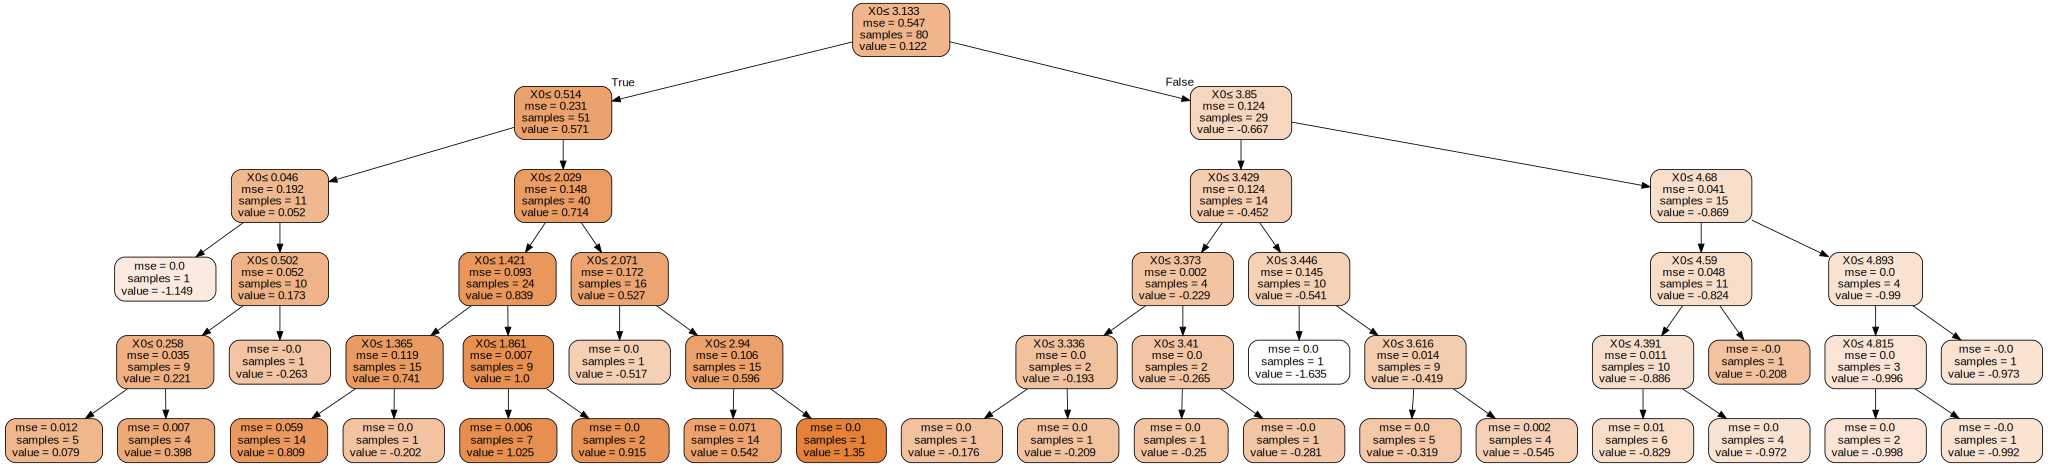

In [35]:
graph4=graphviz.Source(dot_data4)
graph4

In [36]:
dot_data5 = tree.export_graphviz(regr1, out_file=None, filled=True, rounded=True, special_characters=True)

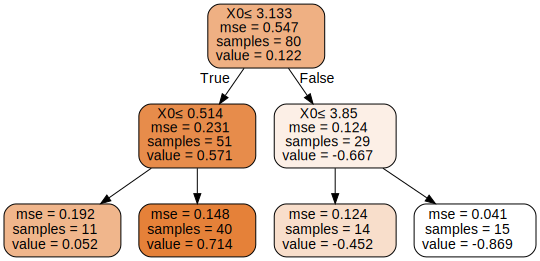

In [37]:
graph5=graphviz.Source(dot_data5 )
graph5